In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib as plt


In [2]:
#import data
char_df = pd.read_csv('charity_data.csv')
char_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
#drop the columns that I won't need
charity_df = char_df.drop(['EIN', 'NAME'], axis=1)

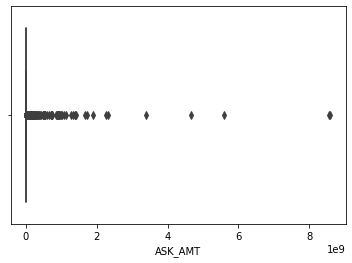

In [4]:
#ask amount might differ and thus have major outliers 
import seaborn as sns
sns.boxplot(x=charity_df['ASK_AMT'])

In [5]:
#check for null values
charity_df.isnull().sum()

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [6]:
#get the number of unique values 
char_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

charity_df[char_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [7]:
classification_count = charity_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C2600        1
C1570        1
C1236        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
#Combine rare categorical values via bucketing
replace_class = list(classification_count[classification_count < 500].index)

for c in replace_class:
    charity_df['CLASSIFICATION'] = charity_df['CLASSIFICATION'].replace(c,"Other")

charity_df['CLASSIFICATION'].value_counts()


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [9]:
application_count = charity_df['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
replace_app = list(application_count[application_count < 500].index)
for a in replace_app:
    charity_df['APPLICATION_TYPE'] = charity_df['APPLICATION_TYPE'].replace(a,"Other")

charity_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
#Encode categorical variables using one-hot encoding
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(charity_df[char_cat]))

encode_df.columns = enc.get_feature_names(char_cat)

encode_df.tail()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(char_cat,1)


In [13]:
#define features and target, and split the data
y = charity_df['IS_SUCCESSFUL']
X = charity_df.drop('IS_SUCCESSFUL', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [14]:
#standardize numerical values
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X_train_scaled.shape

(25724, 44)

In [16]:
#create a binary classification model, complie , train and evaluate 
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                736       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [18]:
#first attempt at 100 epochs 
fit_model1 = nn.fit(X_train_scaled, y_train, epochs=100) 
model1_loss, model1_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model1_loss}, Accuracy: {model1_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5799 - accuracy: 0.7137
Epoch 2/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5596 - accuracy: 0.7271
Epoch 3/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5552 - accuracy: 0.7291
Epoch 4/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5530 - accuracy: 0.7296
Epoch 5/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5510 - accuracy: 0.7302
Epoch 6/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5499 - accuracy: 0.7308
Epoch 7/100
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5484 - accuracy: 0.7320
Epoch 8/100
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5479 - accuracy: 0.7317
Epoch 9/100
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5470 - accuracy: 0.7327
Epoch

25724/25724 [==============================] - 1s 22us/sample - loss: 0.5369 - accuracy: 0.7364
Epoch 77/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5370 - accuracy: 0.7373
Epoch 78/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5371 - accuracy: 0.7369
Epoch 79/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5367 - accuracy: 0.7379
Epoch 80/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5369 - accuracy: 0.7381
Epoch 81/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5366 - accuracy: 0.7381
Epoch 82/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5367 - accuracy: 0.7375
Epoch 83/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5369 - accuracy: 0.7374
Epoch 84/100
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5366 - accuracy: 0.7376
Epoch 85/100
25724/25724 [======

In [21]:
#trying out 200 epochs
fit_model2 = nn.fit(X_train_scaled, y_train, epochs=200) 
model2_loss, model2_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model2_loss}, Accuracy: {model2_accuracy}")

Train on 25724 samples
Epoch 1/200
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5366 - accuracy: 0.7389
Epoch 2/200
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5366 - accuracy: 0.7383
Epoch 3/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5364 - accuracy: 0.7385
Epoch 4/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5365 - accuracy: 0.7372
Epoch 5/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5366 - accuracy: 0.7368
Epoch 6/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5364 - accuracy: 0.7383
Epoch 7/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5363 - accuracy: 0.7383
Epoch 8/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5363 - accuracy: 0.7390
Epoch 9/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5363 - accuracy: 0.7385
Epoch

25724/25724 [==============================] - 1s 26us/sample - loss: 0.5349 - accuracy: 0.7392
Epoch 77/200
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5348 - accuracy: 0.7396
Epoch 78/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5348 - accuracy: 0.7397
Epoch 79/200
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5348 - accuracy: 0.7391
Epoch 80/200
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5347 - accuracy: 0.7391
Epoch 81/200
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5349 - accuracy: 0.7371
Epoch 82/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5346 - accuracy: 0.7387
Epoch 83/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5347 - accuracy: 0.7398
Epoch 84/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5347 - accuracy: 0.7385
Epoch 85/200
25724/25724 [======

In [29]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
fit_model2 = nn.fit(X_train_scaled, y_train, epochs=200) 
model2_loss, model2_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model2_loss}, Accuracy: {model2_accuracy}")

Train on 25724 samples
Epoch 1/200
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5820 - accuracy: 0.7107
Epoch 2/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5553 - accuracy: 0.7289
Epoch 3/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5517 - accuracy: 0.7296
Epoch 4/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5502 - accuracy: 0.7299
Epoch 5/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5489 - accuracy: 0.7294
Epoch 6/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5479 - accuracy: 0.7299
Epoch 7/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5470 - accuracy: 0.7307
Epoch 8/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5463 - accuracy: 0.7313
Epoch 9/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5461 - accuracy: 0.7322
Epoch

25724/25724 [==============================] - 1s 22us/sample - loss: 0.5377 - accuracy: 0.7375
Epoch 77/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5375 - accuracy: 0.7385
Epoch 78/200
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5377 - accuracy: 0.7377
Epoch 79/200
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5376 - accuracy: 0.7368
Epoch 80/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5379 - accuracy: 0.7369
Epoch 81/200
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5377 - accuracy: 0.7380
Epoch 82/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5374 - accuracy: 0.7373
Epoch 83/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5375 - accuracy: 0.7378
Epoch 84/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5373 - accuracy: 0.7379
Epoch 85/200
25724/25724 [======

In [17]:
#trying a model obviously less effective, but you never know 
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer = 16

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))


nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=200) 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/200
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6057 - accuracy: 0.6899
Epoch 2/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5717 - accuracy: 0.7234
Epoch 3/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5677 - accuracy: 0.7251
Epoch 4/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5646 - accuracy: 0.7260
Epoch 5/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5619 - accuracy: 0.7279
Epoch 6/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5599 - accuracy: 0.7293
Epoch 7/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5583 - accuracy: 0.7288
Epoch 8/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5568 - accuracy: 0.7295
Epoch 9/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5554 - accuracy: 0.7296
Epoch

25724/25724 [==============================] - 1s 25us/sample - loss: 0.5395 - accuracy: 0.7362
Epoch 77/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5396 - accuracy: 0.7363
Epoch 78/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5393 - accuracy: 0.7368
Epoch 79/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5393 - accuracy: 0.7357
Epoch 80/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5394 - accuracy: 0.7368
Epoch 81/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5393 - accuracy: 0.7368
Epoch 82/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5390 - accuracy: 0.7360
Epoch 83/200
25724/25724 [==============================] - 1s 21us/sample - loss: 0.5392 - accuracy: 0.7360
Epoch 84/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5391 - accuracy: 0.7369
Epoch 85/200
25724/25724 [======

In [31]:
#the accuracy actually didn't suffer, so I'm gonna tweak it a little more
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 8
nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [32]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=200) 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/200
25724/25724 [==============================] - 1s 32us/sample - loss: 0.6102 - accuracy: 0.7011
Epoch 2/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5732 - accuracy: 0.7258
Epoch 3/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5698 - accuracy: 0.7269
Epoch 4/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5663 - accuracy: 0.7281
Epoch 5/200
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5634 - accuracy: 0.7290
Epoch 6/200
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5607 - accuracy: 0.7291
Epoch 7/200
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5587 - accuracy: 0.7300
Epoch 8/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5570 - accuracy: 0.7303
Epoch 9/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5558 - accuracy: 0.7307
Epoch

25724/25724 [==============================] - 1s 24us/sample - loss: 0.5393 - accuracy: 0.7374
Epoch 77/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5394 - accuracy: 0.7369
Epoch 78/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5392 - accuracy: 0.7381
Epoch 79/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5393 - accuracy: 0.7366
Epoch 80/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5390 - accuracy: 0.7366
Epoch 81/200
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5390 - accuracy: 0.7372
Epoch 82/200
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5389 - accuracy: 0.7376
Epoch 83/200
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5390 - accuracy: 0.7372
Epoch 84/200
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5389 - accuracy: 0.7370
Epoch 85/200
25724/25724 [======

In [29]:
#well, this just made it worse, so I have to take a different route
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()


nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/300
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5867 - accuracy: 0.7130
Epoch 2/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5594 - accuracy: 0.7265
Epoch 3/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5552 - accuracy: 0.7288
Epoch 4/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5530 - accuracy: 0.7307
Epoch 5/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5512 - accuracy: 0.7306
Epoch 6/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5505 - accuracy: 0.7300
Epoch 7/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5495 - accuracy: 0.7314
Epoch 8/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5491 - accuracy: 0.7316
Epoch 9/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5485 - accuracy: 0.7313
Epoch

25724/25724 [==============================] - 1s 22us/sample - loss: 0.5395 - accuracy: 0.7357
Epoch 77/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5398 - accuracy: 0.7369
Epoch 78/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5397 - accuracy: 0.7363
Epoch 79/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5392 - accuracy: 0.7360
Epoch 80/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5393 - accuracy: 0.7357
Epoch 81/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5396 - accuracy: 0.7365
Epoch 82/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5392 - accuracy: 0.7356
Epoch 83/300
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5396 - accuracy: 0.7363
Epoch 84/300
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5393 - accuracy: 0.7360
Epoch 85/300
25724/25724 [======

25724/25724 [==============================] - 1s 22us/sample - loss: 0.5367 - accuracy: 0.7372
Epoch 225/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5365 - accuracy: 0.7386
Epoch 226/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5362 - accuracy: 0.7376
Epoch 227/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5367 - accuracy: 0.7381
Epoch 228/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5361 - accuracy: 0.7376
Epoch 229/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5362 - accuracy: 0.7394
Epoch 230/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5361 - accuracy: 0.7382
Epoch 231/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5366 - accuracy: 0.7380
Epoch 232/300
25724/25724 [==============================] - 1s 22us/sample - loss: 0.5361 - accuracy: 0.7382
Epoch 233/300
25724/2572

In [23]:
#None of these seem to work great so I am gonna try random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 128, random_state = 1)

In [24]:
rf_model = rf_model.fit(X_train_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2695,1315
Actual 1,1158,3407


In [26]:
acc = accuracy_score(y_test, predictions)
acc

0.711603498542274

In [28]:
#that is worse than ever, so I am doing gradient boost here 

from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=100,
                                           learning_rate=learning_rate,
                                           max_features=5,
                                           max_depth=3,
                                           random_state=0)
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(
       classifier.score(
           X_train_scaled,
           y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
       classifier.score(
           X_test_scaled,
           y_test)))

Learning rate:  0.05
Accuracy score (training): 0.725
Accuracy score (validation): 0.723
Learning rate:  0.1
Accuracy score (training): 0.729
Accuracy score (validation): 0.724
Learning rate:  0.25
Accuracy score (training): 0.731
Accuracy score (validation): 0.723
Learning rate:  0.5
Accuracy score (training): 0.736
Accuracy score (validation): 0.724
Learning rate:  0.75
Accuracy score (training): 0.738
Accuracy score (validation): 0.723
Learning rate:  1
Accuracy score (training): 0.737
Accuracy score (validation): 0.725
